# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [5]:
housing = pd.read_csv("Housing.csv")

In [6]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
housing.shape

(545, 13)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


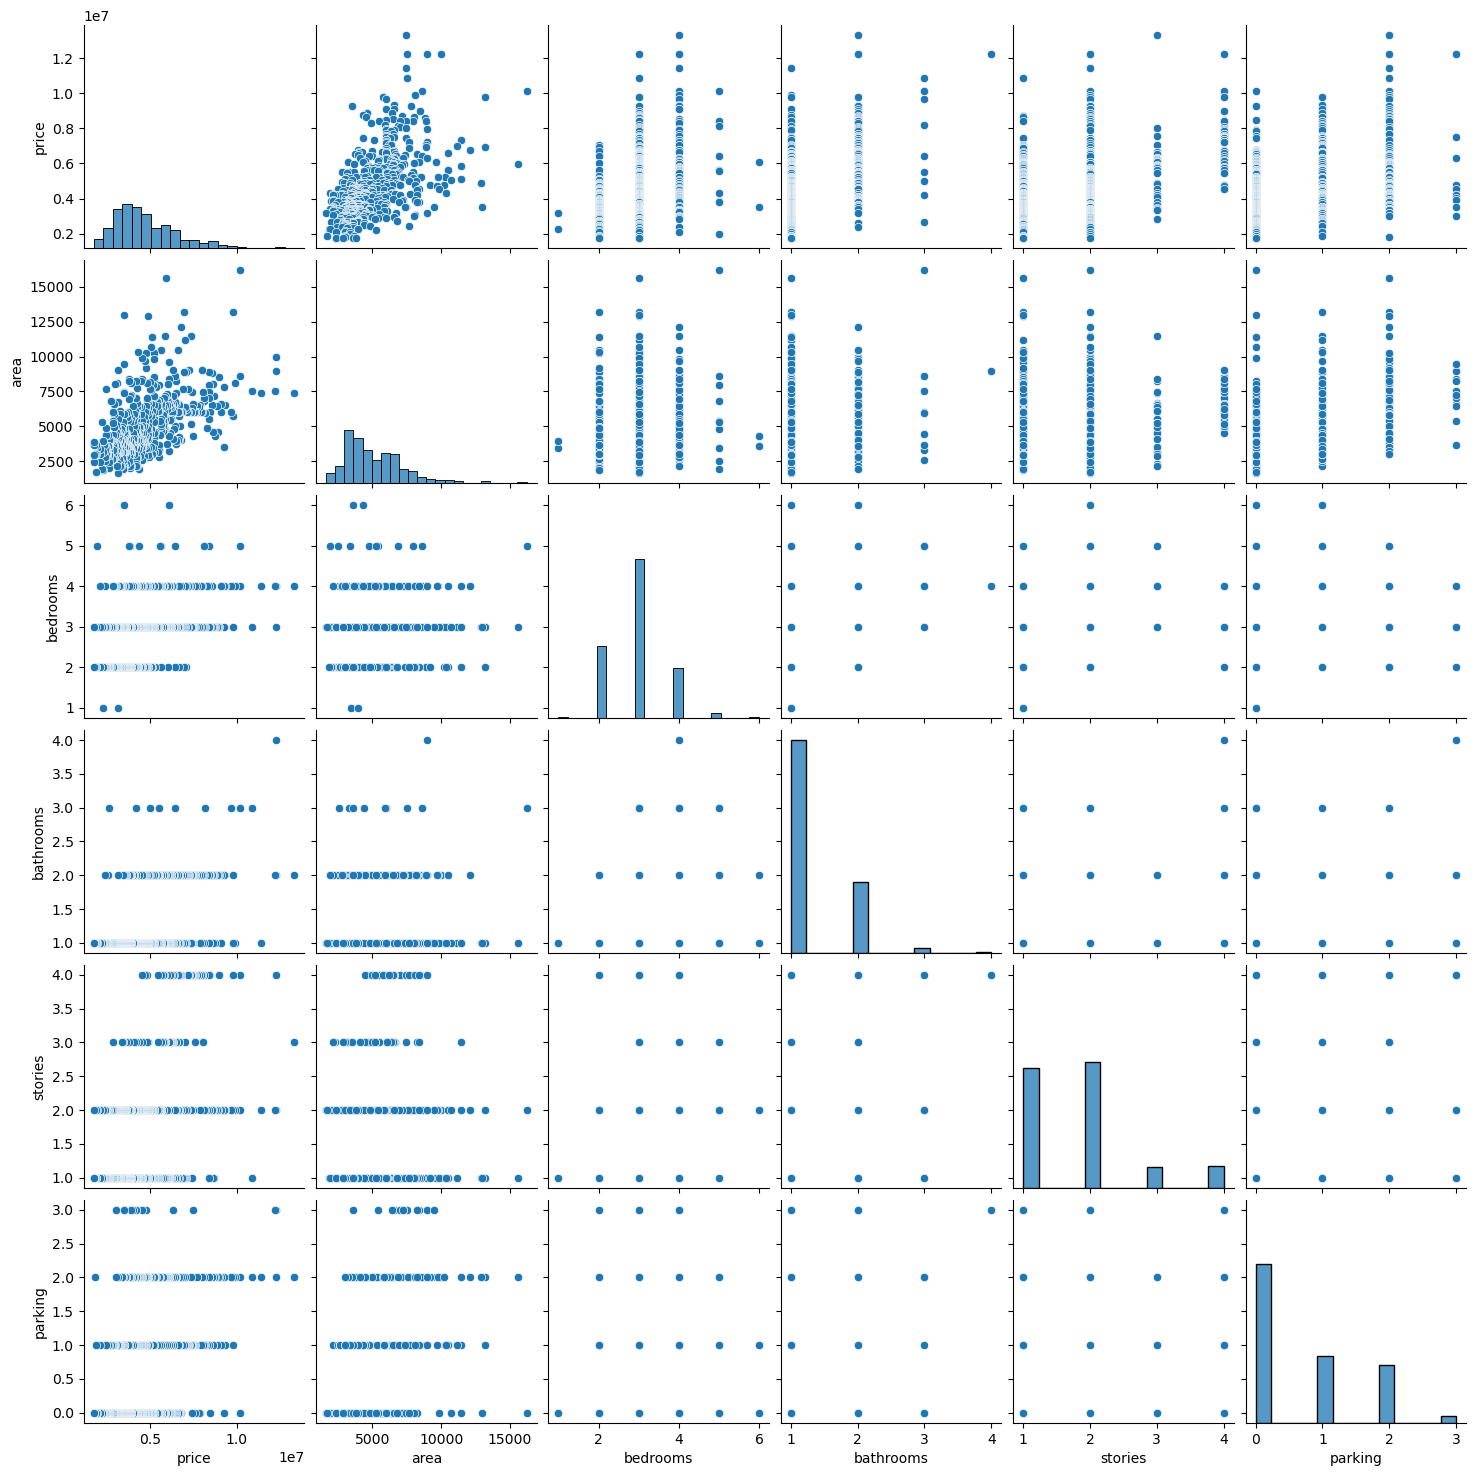

In [10]:
# visualizing the numerical variables

sns.pairplot(housing)
plt.show()

In [11]:
# visualizing categorical variables

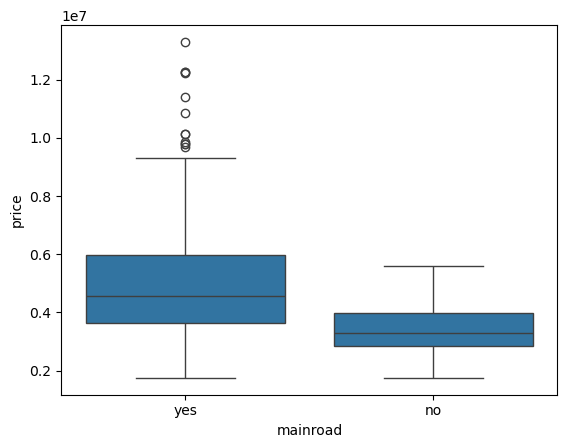

In [12]:
sns.boxplot(x='mainroad',y='price',data=housing)
plt.show()

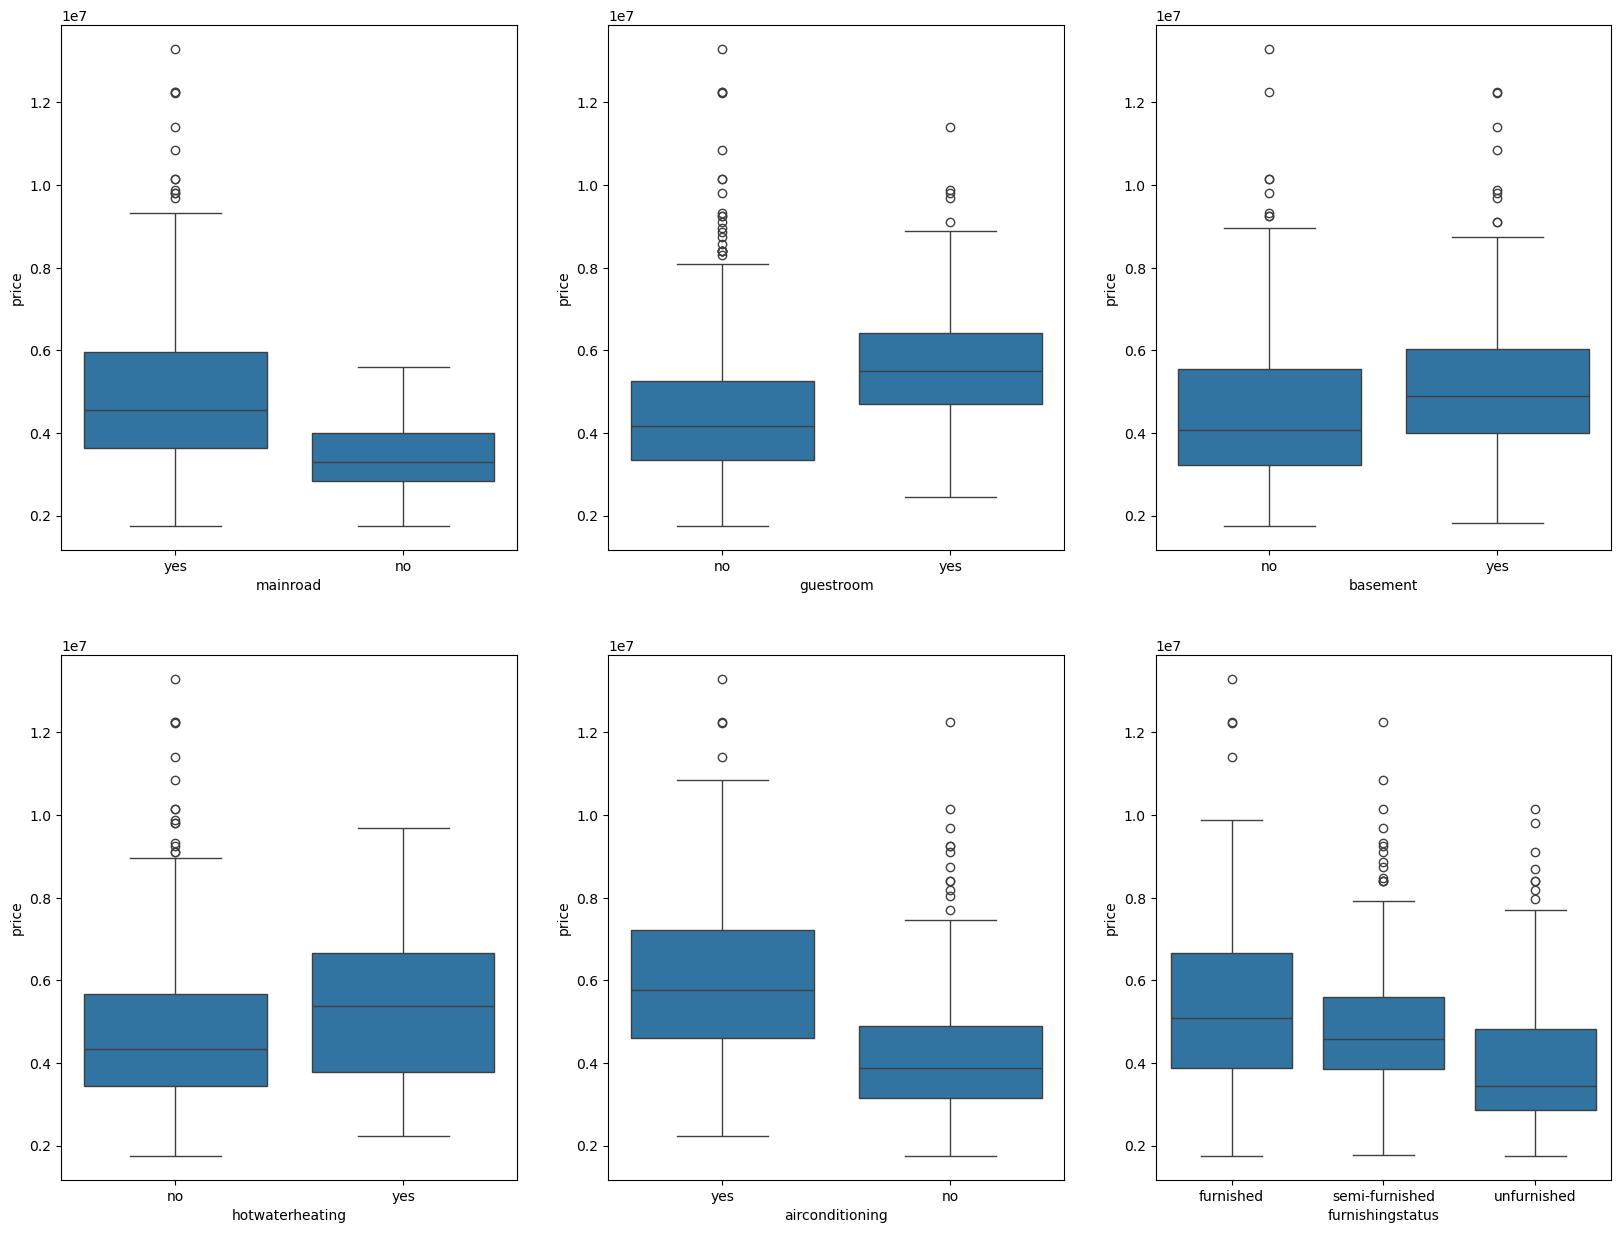

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=housing)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=housing)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=housing)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=housing)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=housing)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=housing)
plt.show()

# Step 2: Preparing data for modelling

- Encoding
    - Converting binary categorical variables ( the one with yes or no) to 1/0
    - other categorical variables to dummy variables. 

In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
housing.airconditioning.value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [18]:
# Converting binary categorical variables ( the one with yes or no) to 1/0

varList = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

housing[varList] = housing[varList].apply(lambda x:x.map({'yes': 1,'no':0}))

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [19]:
## create dummy variables for categorial variable with 3 categorial levels

status = pd.get_dummies(housing['furnishingstatus']).astype(int)
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [20]:
# droppping one column (categorial level) for efficency / redundunt variable 

status = pd.get_dummies(housing['furnishingstatus'],drop_first=True).astype(int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [21]:
# concat the dummy dataframe to original one

housing = pd.concat([housing, status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [22]:
housing = housing.drop('furnishingstatus',axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [23]:
# split the data into train data and test data

# one way of doing it train_test_split(X,y)

# second way

df_train, df_test = train_test_split(housing, test_size=0.7,random_state=100)

print(df_train.shape)
print(df_test.shape)


(163, 14)
(382, 14)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling : normalizes the data between 0 and 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [25]:
# x
# normalization : x-xmin/ xmax-xmin
# standardization :  x-xmean/sigma

# it is advisable to use normalization because it takes care of outliers. The outliers will be mapped to 1 and the rest of the data is spread across 0 and 1

steps to use sklearn

1. Instantiate an object
 scaler = MinMaxScaler()

 Create a list of only numerical variables 
  num_Vars =  ['area','bedrooms','bathrooms','stories','parking','price']

2. Fit on data
 scalar.fit_transform(

 fit() = learns what xmin, xmax are
#transfrom() : x-xmin/xmax-xmin

#fit_transform() : does both 



In [27]:
# Building modal ( adding one variable after the other variable)

In [28]:
num_Vars = ['area','bedrooms','bathrooms','stories','parking','price']
scaler = MinMaxScaler()
df_train[num_Vars] = scaler.fit_transform(df_train[num_Vars])

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
284,0.218182,0.508820,0.000000,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
24,0.590909,0.601990,0.333333,0.5,0.333333,1,0,0,0,1,0.666667,0,0,0
168,0.303030,0.191316,0.666667,0.0,0.333333,1,0,1,0,1,0.000000,0,0,0
148,0.333333,0.381275,0.333333,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
463,0.115152,0.085482,0.000000,0.0,0.000000,1,1,1,0,0,0.000000,0,0,1


In [29]:
df_train[num_Vars].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.290714,0.331288,0.144172,0.308793,0.226994,0.275538
std,0.188674,0.238586,0.233888,0.308895,0.278900,0.168922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134781,0.333333,0.000000,0.000000,0.000000,0.157576
50%,0.257531,0.333333,0.000000,0.333333,0.000000,0.235758
75%,0.402985,0.333333,0.500000,0.333333,0.333333,0.363636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


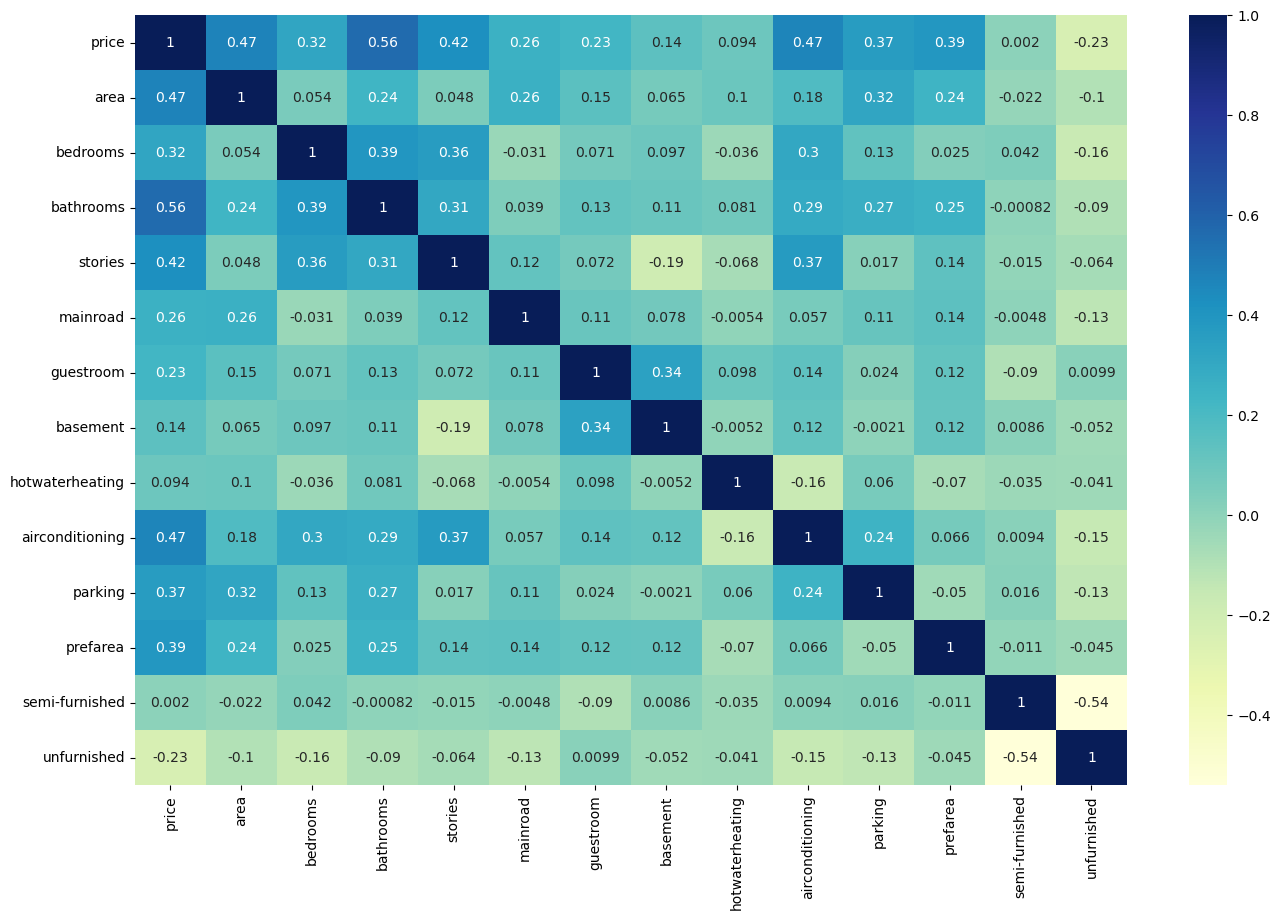

In [30]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [31]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
284,0.218182,0.508820,0.000000,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
24,0.590909,0.601990,0.333333,0.5,0.333333,1,0,0,0,1,0.666667,0,0,0
168,0.303030,0.191316,0.666667,0.0,0.333333,1,0,1,0,1,0.000000,0,0,0
148,0.333333,0.381275,0.333333,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
463,0.115152,0.085482,0.000000,0.0,0.000000,1,1,1,0,0,0.000000,0,0,1


In [32]:
y_train = df_train.pop('price')
X_train = df_train

In [33]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
284,0.508820,0.000000,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
24,0.601990,0.333333,0.5,0.333333,1,0,0,0,1,0.666667,0,0,0
168,0.191316,0.666667,0.0,0.333333,1,0,1,0,1,0.000000,0,0,0
148,0.381275,0.333333,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
463,0.085482,0.000000,0.0,0.000000,1,1,1,0,0,0.000000,0,0,1


In [34]:
y_train

284    0.218182
24     0.590909
168    0.303030
148    0.333333
463    0.115152
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 163, dtype: float64

In [35]:
# add a constant for stats model

# Add a constant
X_train_sm = sm.add_constant(X_train[['area']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

In [36]:
lr_model.params

const    0.152549
area     0.423059
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     46.28
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.91e-10
Time:                        11:05:22   Log-Likelihood:                 79.674
No. Observations:                 163   AIC:                            -155.3
Df Residuals:                     161   BIC:                            -149.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1525      0.022      7.085      0.000       0.110       0.195
area           0.4231      0.062      6.803      0.000       0.300       0.546
==============================================================================
Omnibus:                       39.842   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.747
Skew:                           1.083   Prob(JB):                     3.96e-19
Kurtosis:                       5.791   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# add another variable (bathroom) 

# will use bathroom as it has 0.53 corleation

X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)


# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

In [39]:
lr_model.params

const        0.132057
area         0.322673
bathrooms    0.344559
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           9.11e-21
Time:                        11:05:22   Log-Likelihood:                 106.09
No. Observations:                 163   AIC:                            -206.2
Df Residuals:                     160   BIC:                            -196.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1321      0.019      7.118      0.000       0.095       0.169
area           0.3227      0.055      5.912      0.000       0.215       0.430
bathrooms      0.3446      0.044      7.826      0.000       0.258       0.432
==============================================================================
Omnibus:                       47.136   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.966
Skew:                           1.172   Prob(JB):                     2.69e-28
Kurtosis:                       6.633   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# add another variable (airconditioning) 

# will use bathroom as it has 0.53 corleation

X_train_sm = X_train[['area','bathrooms','airconditioning']]
X_train_sm = sm.add_constant(X_train_sm)


# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

In [42]:
lr_model.params

const              0.116058
area               0.291119
bathrooms          0.288924
airconditioning    0.106086
dtype: float64

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     56.32
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.36e-25
Time:                        11:05:22   Log-Likelihood:                 118.08
No. Observations:                 163   AIC:                            -228.2
Df Residuals:                     159   BIC:                            -215.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1161      0.018      6.601      0.000       0.081       0.151
area                0.2911      0.051      5.680      0.000       0.190       0.392
bathrooms           0.2889      0.043      6.798      0.000       0.205       0.373
airconditioning     0.1061      0.021      5.021      0.000       0.064       0.148
==============================================================================
Omnibus:                       49.509   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.848
Skew:                           1.256   Prob(JB):                     1.73e-28
Kurtosis:                       6.538   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Second way of model building 

## Adding all the variable at a time to the modal

In [45]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [46]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

In [47]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     21.45
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.40e-28
Time:                        11:05:22   Log-Likelihood:                 145.05
No. Observations:                 163   AIC:                            -262.1
Df Residuals:                     149   BIC:                            -218.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0539      0.035      1.554      0.122      -0.015       0.123
area                0.1862      0.050      3.751      0.000       0.088       0.284
bedrooms            0.0154      0.040      0.383      0.702      -0.064       0.095
bathrooms           0.1790      0.042      4.224      0.000       0.095       0.263
stories             0.1204      0.033      3.681      0.000       0.056       0.185
mainroad            0.0455      0.029      1.594      0.113      -0.011       0.102
guestroom           0.0201      0.023      0.861      0.391      -0.026       0.066
basement            0.0224      0.020      1.138      0.257      -0.016       0.061
hotwaterheating     0.0705      0.037      1.883      0.062      -0.003       0.145
airconditioning     0.0710      0.021      3.391      0.001       0.030       0.112
parking             0.0961      0.033      2.908      0.004       0.031       0.161
prefarea            0.0876      0.021      4.144      0.000       0.046       0.129
semi-furnished     -0.0180      0.020     -0.899      0.370      -0.058       0.022
unfurnished        -0.0456      0.022     -2.062      0.041      -0.089      -0.002
==============================================================================
Omnibus:                       51.883   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.331
Skew:                           1.298   Prob(JB):                     3.37e-31
Kurtosis:                       6.731   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# drop the variables based on the signifiance and VIF 
# significance (p-values) 
# VIF 

### VIF



### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

# any value which is higher than 5 is preity high

5 = 1/(1-r2)
1-r2 = 0.2
r2=0.8 

That means 90% of bedrooms is explained by other feature variables 

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mainroad,6.25
0,area,4.32
1,bedrooms,3.58
3,stories,3.05
9,parking,2.11
8,airconditioning,2.06
2,bathrooms,2.02
11,semi-furnished,1.98
6,basement,1.97
12,unfurnished,1.63


We could have :
 - high VIF, high p value
 - high - low cases
    - high vif, low p - *Remove these after the first one is removed*
    - low vif, high p - * remove this first*
 - low vif, low p value - *keep this one*

In [55]:
# remove semifurnished column and create a new model 

X = X_train.drop('semi-furnished',axis=1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     23.20
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.91e-28
Time:                        11:05:22   Log-Likelihood:                 144.61
No. Observations:                 163   AIC:                            -263.2
Df Residuals:                     150   BIC:                            -223.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0402      0.031      1.292      0.199      -0.021       0.102
area                0.1874      0.050      3.779      0.000       0.089       0.285
bedrooms            0.0166      0.040      0.412      0.681      -0.063       0.096
bathrooms           0.1786      0.042      4.218      0.000       0.095       0.262
stories             0.1207      0.033      3.691      0.000       0.056       0.185
mainroad            0.0471      0.028      1.656      0.100      -0.009       0.103
guestroom           0.0215      0.023      0.924      0.357      -0.025       0.068
basement            0.0221      0.020      1.125      0.263      -0.017       0.061
hotwaterheating     0.0729      0.037      1.953      0.053      -0.001       0.147
airconditioning     0.0720      0.021      3.451      0.001       0.031       0.113
parking             0.0970      0.033      2.937      0.004       0.032       0.162
prefarea            0.0880      0.021      4.167      0.000       0.046       0.130
unfurnished        -0.0346      0.018     -1.879      0.062      -0.071       0.002
==============================================================================
Omnibus:                       53.767   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.184
Skew:                           1.337   Prob(JB):                     4.03e-33
Kurtosis:                       6.849   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mainroad,5.56
0,area,4.31
1,bedrooms,3.51
3,stories,3.05
9,parking,2.11
8,airconditioning,2.06
2,bathrooms,2.01
6,basement,1.96
10,prefarea,1.57
5,guestroom,1.45


In [57]:
# remove bedrooms column as it has hight p value and create a new model 

X = X_train.drop('bedrooms',axis=1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     23.36
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.38e-28
Time:                        11:05:22   Log-Likelihood:                 144.97
No. Observations:                 163   AIC:                            -263.9
Df Residuals:                     150   BIC:                            -223.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0585      0.033      1.800      0.074      -0.006       0.123
area                0.1858      0.049      3.754      0.000       0.088       0.284
bathrooms           0.1835      0.041      4.519      0.000       0.103       0.264
stories             0.1238      0.031      3.941      0.000       0.062       0.186
mainroad            0.0444      0.028      1.568      0.119      -0.012       0.100
guestroom           0.0200      0.023      0.858      0.392      -0.026       0.066
basement            0.0234      0.019      1.203      0.231      -0.015       0.062
hotwaterheating     0.0699      0.037      1.874      0.063      -0.004       0.144
airconditioning     0.0716      0.021      3.444      0.001       0.031       0.113
parking             0.0965      0.033      2.928      0.004       0.031       0.162
prefarea            0.0867      0.021      4.138      0.000       0.045       0.128
semi-furnished     -0.0182      0.020     -0.914      0.362      -0.058       0.021
unfurnished        -0.0466      0.022     -2.133      0.035      -0.090      -0.003
==============================================================================
Omnibus:                       53.247   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.234
Skew:                           1.325   Prob(JB):                     1.07e-32
Kurtosis:                       6.829   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,6.06
0,area,4.32
2,stories,2.75
8,parking,2.10
7,airconditioning,2.04
10,semi-furnished,1.94
5,basement,1.91
1,bathrooms,1.88
11,unfurnished,1.62
9,prefarea,1.55


# Residual analysis


In [60]:
y_train_pred = lr_model.predict(X_train_sm)

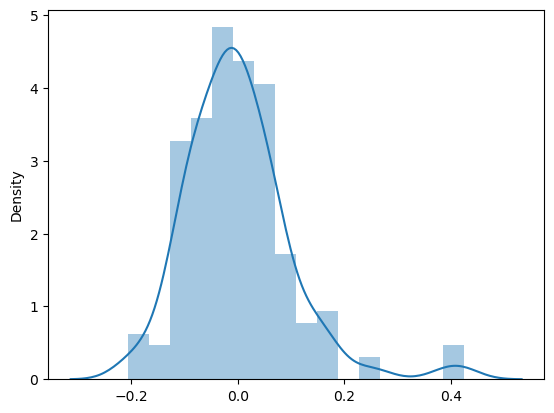

In [61]:
res = y_train-y_train_pred

sns.distplot(res)
plt.show()


In [62]:
# Prediction and evaluation of the test set

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,0.255066,0.263832,0.317627,0.142670,0.251309,0.842932,0.178010,0.353403,0.041885,0.316754,0.232984,0.235602,0.421466,0.337696
std,0.158704,0.199170,0.249322,0.258577,0.278975,0.364342,0.383023,0.478653,0.200589,0.465821,0.291004,0.424931,0.494441,0.473545
min,0.000000,-0.044776,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139394,0.124378,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.218485,0.213026,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.342424,0.357757,0.333333,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.271370,1.333333,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
y_test = df_test.pop('price')
X_test= df_test

In [65]:
X_test_sm= sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.066486,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.348711,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.734871,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.287200,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.253731,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [66]:
X_test_sm = X_test_sm.drop(['bedrooms',],axis=1)

In [67]:
X_test_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.066486,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.348711,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.734871,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.287200,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.253731,0.0,0.333333,1,0,0,0,1,0.000000,0,0


In [71]:
y_test_pred = lr_model.predict(X_test_sm)

ValueError: shapes (382,12) and (13,) not aligned: 12 (dim 1) != 13 (dim 0)

In [69]:
from sklearn.metrics import r2_score